# Homework 3
> Alfaifi, Ammar - 201855360

In [268]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import comb, factorial, log
from scipy.special import gamma
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg', 'pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (11, 4)
}
sns.set_theme()

## Question 1

$N_A = 143$, $N_B = 55$, and $q= 90$

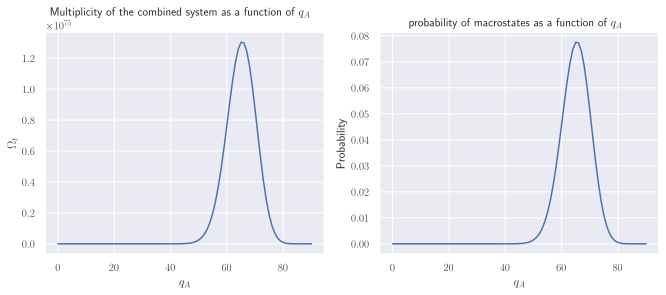

In [166]:
N_A = 143
N_B = 55
N = N_A + N_B
q_total = 90

q_A = np.arange(0, q_total+1)
q_B = q_A[::-1]

omega_A = np.array([comb(q + N_A - 1, q) for q in q_A])
omega_B = np.array([comb(q + N_B - 1, q) for q in q_B])
omega_total = omega_A * omega_B
prob = omega_total / np.sum(omega_total)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Multiplicity of the combined system as a function of $q_A$')
ax2.set_title('probability of macrostates as a function of $q_A$')
ax1.set_xlabel('$q_A$')
ax1.set_ylabel('$\Omega_t$')
ax1.plot(q_A, omega_total)
ax2.plot(q_A, prob)
ax2.set_xlabel('$q_A$')
ax2.set_ylabel('Probability')
plt.show()

In [129]:
print(f'The most probable macrostate is {prob.argmax()} with probability of {prob.max():.4f}')
print(f'The least probable macrostate is {prob.argmin()} with probability of {prob.min()}')

The most probable macrostate is 65 with probability of 0.0775
The least probable macrostate is 0 with probability of 9.629268368305522e-37


## Question 2

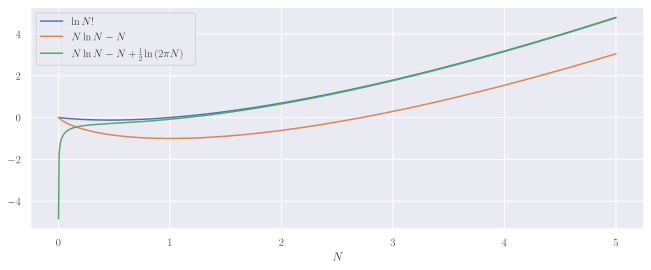

In [249]:
N = np.linspace(1e-5, 5, 1000)

plt.plot(N, np.log(gamma(N + 1)), label=r'$\ln{N!}$')
plt.plot(N, N * np.log(N) - N, label=r'$N \ln{N} - N$')
plt.plot(
    N, N * np.log(N) - N + 0.5* np.log(2*np.pi*N),
    label=r'$N \ln{N} - N + \frac{1}{2} \ln{(2 \pi N)}$'
)
plt.xlabel(r'$N$')
plt.plot()
plt.legend()
plt.show()

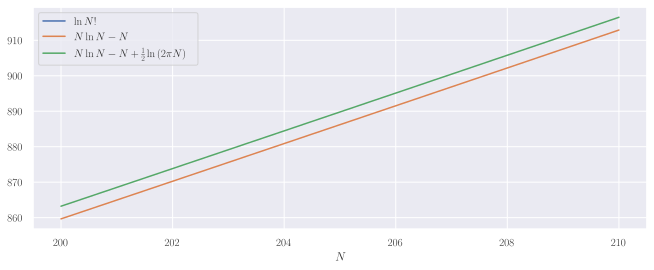

In [210]:
N = np.linspace(200, 210, 10)

plt.plot(N, np.log(gamma(N + 1)), label=r'$\ln{N!}$')
plt.plot(N, N * np.log(N) - N, label=r'$N \ln{N} - N$')
plt.plot(
    N, N * np.log(N) - N + 0.5* np.log(2*np.pi*N),
    label=r'$N \ln{N} - N + \frac{1}{2} \ln{(2 \pi N)}$'
)
plt.xlabel(r'$N$')
plt.plot()
plt.legend()
plt.show()

Using the following for percentage difference
$$
    p = \frac{|a - b|}{(a + b)/2} \times 100
$$

### $\ln{N!}$ and $N \ln{N} - N$

In [264]:
N = 1000
def per_diff(a, b):
    return abs(a - b) / (a + b) / 2 * 100
a = log(factorial(N), np.e)
b = N * np.log(N) - N
print(f'{per_diff(a, b):.4f} %')

0.0185 %


### $\ln{N!}$ and $N \ln{N} - N + \frac{1}{2} \ln{(2 \pi N)}$

In [258]:
b = N * np.log(N) - N + 0.5* np.log(2*np.pi*N)
print(f'{per_diff(a, b):.8f} %')

0.00000035 %


### $N!$ and $N e^{-N}$

In [272]:
a = factorial(N)
b = int(N * np.exp(-N))
print(f'{per_diff(a, b):} %')

50.0 %


### $N!$ and $N e^{-N} \sqrt{2 \pi N}$

In [271]:
a = factorial(N)
b = int(N * np.exp(-N) * np.sqrt(2 * np.pi * N))
print(f'{per_diff(a, b):} %')

50.0 %


## Question 3

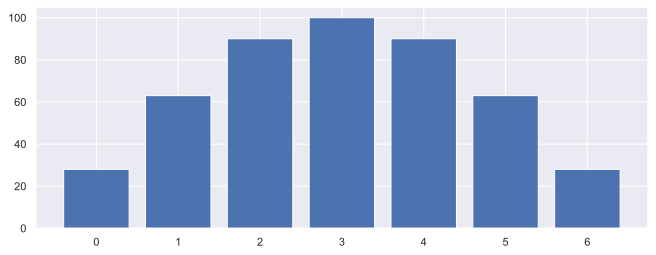

3

In [121]:
N_A = 3
N_B = 3
N = N_A + N_B
q_total = 6

q_A = np.arange(0, q_total+1)
q_B = q_A[::-1]

omega_A = np.array([comb(q + N_A - 1, q) for q in q_A])
omega_B = np.array([comb(q + N_B - 1, q) for q in q_B])

plt.bar(q_A, omega_A*omega_B)
plt.show()
np.sum(omega_A*omega_B), comb(q_total + N + -1, q_total)

(omega_A*omega_B).argmax()